In [1]:
!pip install pandas
!pip install tensorflow
!pip install sklearn
!pip install matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Importing Packages

In [33]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Loading Dataset

In [75]:
url = 'https://raw.githubusercontent.com/OmarElmanzalawy/root_cause_analysis_model/main/root_cause_analysis.csv'
dataset = pd.read_csv(url)
#Removing ID column
dataset.drop('ID',inplace=True,axis=1)
print(dataset)



     CPU_LOAD  MEMORY_LEAK_LOAD  DELAY  ERROR_1000  ERROR_1001  ERROR_1002  \
0           0                 0      0           0           1           0   
1           0                 0      0           0           0           0   
2           0                 1      1           0           0           1   
3           0                 1      0           1           1           0   
4           1                 1      0           1           0           1   
..        ...               ...    ...         ...         ...         ...   
995         0                 0      0           0           0           0   
996         0                 0      0           1           0           0   
997         1                 1      1           0           0           0   
998         0                 1      1           1           1           0   
999         1                 0      0           0           1           1   

     ERROR_1003      ROOT_CAUSE  
0             1     MEMORY_LE

Preapare Input Data for Deep Learning
  - Convert dataFrame to numpy array
  - Scale feature dataset
  - Use one-hot encoding for target variables
  - Split data into training and datasets

In [76]:
from sklearn import preprocessing
#Convert target variables from string to numeric values
label_encoder = preprocessing.LabelEncoder()
dataset['ROOT_CAUSE'] = label_encoder.fit_transform(dataset['ROOT_CAUSE'])

#Convert feature variables to numpy array
numpy_data = dataset.to_numpy()

#Separate Features and target variables
features_data = numpy_data[:,0:6]
target_data = numpy_data[:,7]


print("\nFeatures before scaling :\n------------------------------------")
print(feature_data[:5,:])
print("\nTarget before scaling :\n------------------------------------")
print(target_data[:5])

#Scaling input data
scaler = StandardScaler().fit(features_data)
features_data = scaler.transform(features_data)

#convert target variables as a one0hot-encoding array
target_data = tf.keras.utils.to_categorical(target_data,3)

print("\nFeatures after scaling :\n------------------------------------")
print(features_data[:5,:])
print("\nTarget after scaling :\n------------------------------------")
print(target_data[:5,:])

features_train,features_test,target_train,target_test = train_test_split(features_data,target_data,test_size=0.10)

print("\nTrain Test Dimensions:\n------------------------------------")
print(features_train.shape, target_train.shape, features_test.shape, target_test.shape)




Features before scaling :
------------------------------------
[[0 0 0 0 1 0 1 1]
 [0 0 0 0 0 0 1 1]
 [0 1 1 0 0 1 1 1]
 [0 1 0 1 1 0 1 1]
 [1 1 0 1 0 1 0 2]]

Target before scaling :
------------------------------------
[1 1 1 1 2]

Features after scaling :
------------------------------------
[[-0.94548368 -0.84747452 -0.80632811 -0.80801767  1.03046381 -0.87210285]
 [-0.94548368 -0.84747452 -0.80632811 -0.80801767 -0.97043679 -0.87210285]
 [-0.94548368  1.17997648  1.24018993 -0.80801767 -0.97043679  1.14665375]
 [-0.94548368  1.17997648 -0.80632811  1.23759669  1.03046381 -0.87210285]
 [ 1.05765971  1.17997648 -0.80632811  1.23759669 -0.97043679  1.14665375]]

Target after scaling :
------------------------------------
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Train Test Dimensions:
------------------------------------
(900, 6) (900, 3) (100, 6) (100, 3)


Creating a Model in Keras
  - Hidden layers
  - Nodes in each layer
  - Activation functions
  - Loss Function & Accuracy measurments

In [77]:
from tensorflow import keras
CLASS_NO = 3

#Creating sequential model in keras
model = keras.models.Sequential()

#TODO: SEE WHY CAN'T MAKE 7 input shapes
#First Hidden Layer
model.add(keras.layers.Dense(128,
    input_shape=(6,),
    name = 'Hidden-Layer-1',
    activation='relu'
))

#Second Hidden Layer
model.add(keras.layers.Dense(128,
    name = 'Hidden-Layer-2',
    activation='relu'
))

#Output Layer
model.add(keras.layers.Dense(CLASS_NO,
    name='Output-Layer',
    activation='softmax'
))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)               │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden-Layer-2 (Dense)               │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output-Layer (Dense)                 │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,795 (69.51 KB)

 Trainable params: 17,795 (69.51 KB)

 Non-trainable params: 0 (0.00 B)

Training and Evaluating the Model


Training Progress:
------------------------------------
Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6515 - loss: 0.8449 - val_accuracy: 0.7722 - val_loss: 0.5336
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7785 - loss: 0.5586 - val_accuracy: 0.7778 - val_loss: 0.5125
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8061 - loss: 0.4564 - val_accuracy: 0.7778 - val_loss: 0.4881
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7889 - loss: 0.5197 - val_accuracy: 0.7889 - val_loss: 0.4775
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7739 - loss: 0.5026 - val_accuracy: 0.7889 - val_loss: 0.4693
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8099 - loss: 0.4530 - val_accuracy: 0.7944 - val_loss: 0.4651
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8347 - loss: 0.4251 - val_accuracy: 0.7833 - val_loss: 0.4582
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy

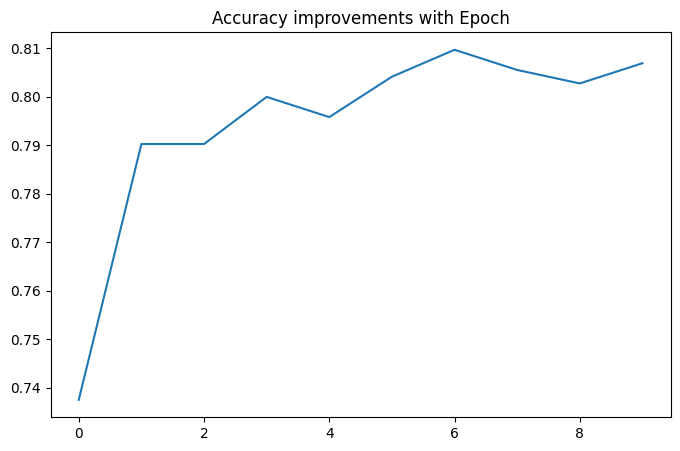


Evaluation against Test Dataset :
------------------------------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8483 - loss: 0.3550 


[0.366155743598938, 0.8500000238418579]

In [78]:
#vebose --> 1 lets you see the progress of the training
VERBOSE = 1

#Hyper Paramaters Setup
BATCH_SIZE = 16

EPOCHS = 10

VALIDATION_SPLIT = 0.2

print("\nTraining Progress:\n------------------------------------")

history = model.fit(features_train,
                    target_train,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = VERBOSE,
                    validation_split = VALIDATION_SPLIT,
                    )

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#plotting accuracy of the model after each epoch
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluating the model
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(features_test,target_test)

Saving and Loading Our Model

In [79]:
model.save('root_cause.keras')

loaded_model = keras.models.load_model('root_cause.keras')

loaded_model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)               │ (None, 128)                 │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden-Layer-2 (Dense)               │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output-Layer (Dense)                 │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,592 (139.04 KB)

 Trainable params: 17,795 (69.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,797 (69.52 KB)

Trying out the Trained Model

In [80]:
#DOESNT PRINT OUT ROOT_CAUSE IN TEXT EQUIVALENT FOR SOME REASON
#FIX

prediction_input = [[1,1,0,1,0,0]]

scaled_input = scaler.transform(prediction_input)

raw_prediction = model.predict(scaled_input)

prediction = np.argmax(raw_prediction)
print(prediction)
print('Prediction is ',label_encoder.inverse_transform([prediction]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1
Prediction is  ['MEMORY_LEAK']
